In [17]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [3]:
file = '../data/pair1.mat'

In [14]:
with h5py.File(file, 'r') as mat_file:
    data1 = mat_file['data1']

    t_x = data1['tx'][:]
    r_x = data1['rx'][:]
    x_loc = data1['array']['el_xc'][:]
    z_loc = data1['array']['el_zc'][:]



## Sensor Pair data 

In [5]:
t_x = np.array(t_x).flatten()
r_x = np.array(r_x).flatten()

In [6]:
df_dict = {
    'pair' : np.array([i+1 for i in range(len(t_x))]),
    'Transmitter' : t_x,
    'Receiver' : r_x
}

In [7]:
df_pair = pd.DataFrame(df_dict).set_index("pair")
df_pair[['Transmitter', 'Receiver']] = df_pair[['Transmitter', 'Receiver']].astype('int')

In [8]:
df_pair

,Transmitter,Receiver
pair,,
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
...,...,...
68,9,4
69,9,5
70,9,6


In [9]:
df_pair.loc[28]

Transmitter    4
Receiver       5
Name: 28, dtype: int32

In [10]:
available_pairs = [1, 2, 3, 4, 10, 11, 12, 19, 20, 28]
df_available = df_pair[df_pair.index.isin(available_pairs)]

In [11]:
df_available

,Transmitter,Receiver
pair,,
1,1,2
2,1,3
3,1,4
4,1,5
10,2,3
11,2,4
12,2,5
19,3,4
20,3,5


## Sensor Location

In [15]:
x_loc = np.array(x_loc).flatten()
z_loc = np.array(z_loc).flatten()

In [19]:
sens_id = np.array([i+1 for i in range(len(x_loc))])

In [20]:
x_loc, z_loc, sens_id

(array([0.16 , 0.282, 0.601, 0.755, 1.022, 1.208, 1.56 , 1.722, 0.912]),
 array([0.141, 0.431, 0.142, 0.455, 0.12 , 0.429, 0.16 , 0.43 , 0.75 ]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

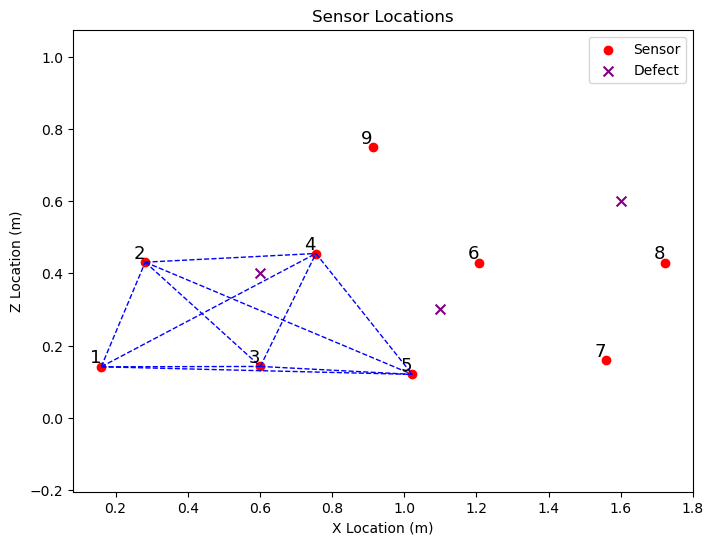

In [71]:
plt.figure(figsize= (8,6))
plt.scatter(x_loc, z_loc, color='red', marker='o', label='Sensor')

for i, txt in enumerate(sens_id):
    plt.text(x_loc[i], z_loc[i], str(txt), fontsize=13, ha='right', va='bottom')

for _, row in df_available.iterrows():
    tx_id, rx_id = int(row["Transmitter"]), int(row["Receiver"])  # Sensor IDs
    tx_index, rx_index = sens_id.tolist().index(tx_id), sens_id.tolist().index(rx_id)  # Find index in x_loc/z_loc

    # Plot line between transmitter and receiver
    plt.plot([x_loc[tx_index], x_loc[rx_index]], 
             [z_loc[tx_index], z_loc[rx_index]], 
             color='blue', linestyle='--', linewidth=1)
    
# Add defect points
x_defect = [1.1, 0.6, 1.6]
z_defect = [0.3, 0.4, 0.6]
plt.scatter(x_defect, z_defect, color='purple', s= 50, marker='x', label='Defect')

plt.axis("equal")
plt.xlabel("X Location (m)")
plt.ylabel("Z Location (m)")
plt.title("Sensor Locations")
plt.legend()
plt.show()